In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data=pd.read_csv('loan_data.csv')

In [104]:
data.head()

,Applicant_ID,Age,Annual_Income,Loan_Amount,Credit_Score,Loan_Tenure,Employment_Status,Dependents,Marital_Status,Loan_Status
0,AID0311,39.0,508.65,145.05,High,3,Salaried,2.0,Married,Approved
1,AID0391,43.0,214.77,225.80,Low,3,Self-employed,0.0,Married,Rejected
2,AID0007,56.0,323.62,356.08,High,5,Salaried,0.0,Single,Approved
3,AID0185,56.0,608.20,215.69,Low,7,Self-employed,0.0,Single,Approved
4,AID0079,60.0,521.97,293.73,Medium,3,Salaried,1.0,Single,Approved


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       525 non-null    object 
 1   Age                500 non-null    float64
 2   Annual_Income      525 non-null    float64
 3   Loan_Amount        497 non-null    float64
 4   Credit_Score       525 non-null    object 
 5   Loan_Tenure        525 non-null    int64  
 6   Employment_Status  525 non-null    object 
 7   Dependents         499 non-null    float64
 8   Marital_Status     525 non-null    object 
 9   Loan_Status        525 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 41.1+ KB


In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,47.492000,15.369397,18.00,36.00,48.50,59.00,84.0
Annual_Income,525.0,621.378629,890.444230,-213.64,379.47,515.32,669.20,11188.1
Loan_Amount,497.0,210.793883,133.621915,-71.07,144.59,200.80,258.64,1318.5
Loan_Tenure,525.0,4.194286,2.610966,1.00,2.00,3.00,5.00,10.0
Dependents,499.0,0.779559,1.029438,0.00,0.00,0.00,1.00,4.0


In [107]:
data.isnull().sum()

,0
Applicant_ID,0
Age,25
Annual_Income,0
Loan_Amount,28
Credit_Score,0
Loan_Tenure,0
Employment_Status,0
Dependents,26
Marital_Status,0
Loan_Status,0


In [108]:
data['Age'].fillna(data.Age.mean(),inplace=True)
data['Loan_Amount'].fillna(data.Loan_Amount.mean(),inplace=True)
data['Dependents'].fillna(data.Dependents.mode()[0],inplace=True)

<ipython-input-108-ab9b6408ac8d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.Age.mean(),inplace=True)
<ipython-input-108-ab9b6408ac8d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [109]:
data.isnull().sum()

,0
Applicant_ID,0
Age,0
Annual_Income,0
Loan_Amount,0
Credit_Score,0
Loan_Tenure,0
Employment_Status,0
Dependents,0
Marital_Status,0
Loan_Status,0


In [110]:
data.duplicated().sum()

25

In [111]:
data.drop_duplicates(inplace=True)

In [112]:
data.columns

Index(['Applicant_ID', 'Age', 'Annual_Income', 'Loan_Amount', 'Credit_Score',
       'Loan_Tenure', 'Employment_Status', 'Dependents', 'Marital_Status',
       'Loan_Status'],
      dtype='object')

<ipython-input-113-f5feccde6ea7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Loan_Amount'],kde=True,hist=True,color='green')


<Axes: xlabel='Loan_Amount', ylabel='Density'>

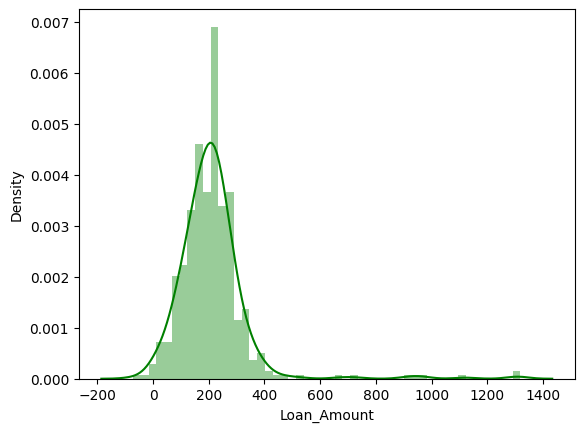

In [113]:
sns.distplot(data['Loan_Amount'],kde=True,hist=True,color='green')

we can know that the max density is distributed from 0-300 loan amount.

<Axes: xlabel='Loan_Amount', ylabel='Count'>

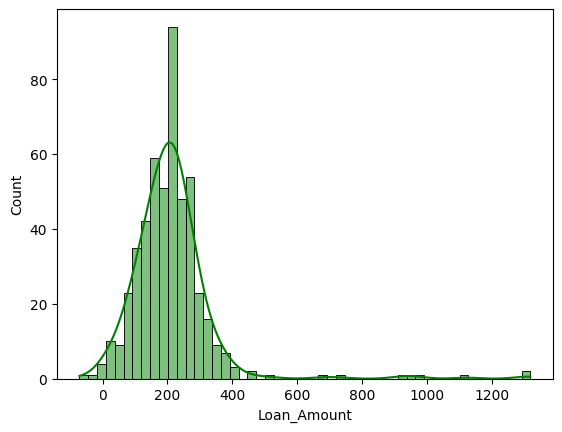

In [114]:
sns.histplot(data['Loan_Amount'],kde=True,color='green')

<Axes: xlabel='count', ylabel='Credit_Score'>

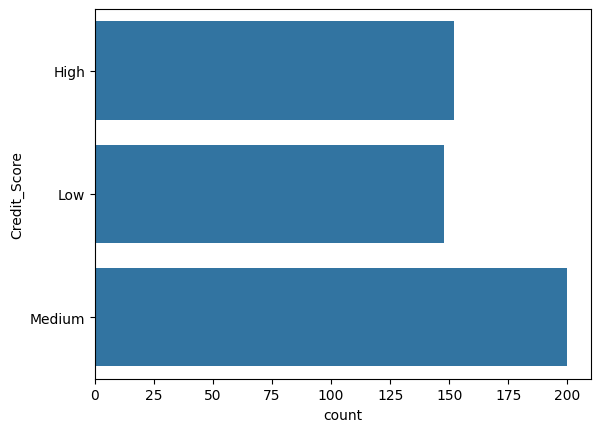

In [115]:
sns.countplot(data['Credit_Score'])

The Maximum people are having their credit score as medium

<Axes: xlabel='Annual_Income', ylabel='Loan_Amount'>

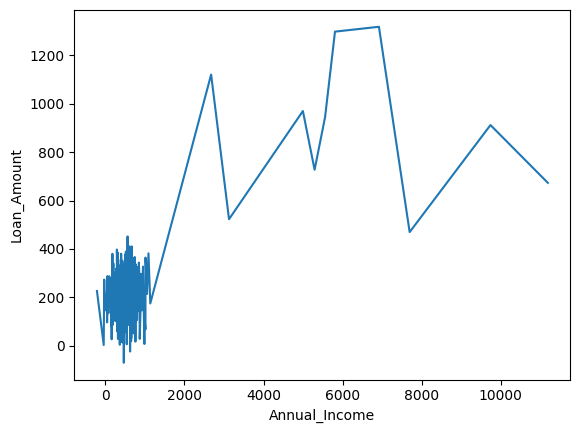

In [116]:
sns.lineplot(x='Annual_Income',y='Loan_Amount',data=data)

<Axes: xlabel='Employment_Status', ylabel='Loan_Amount'>

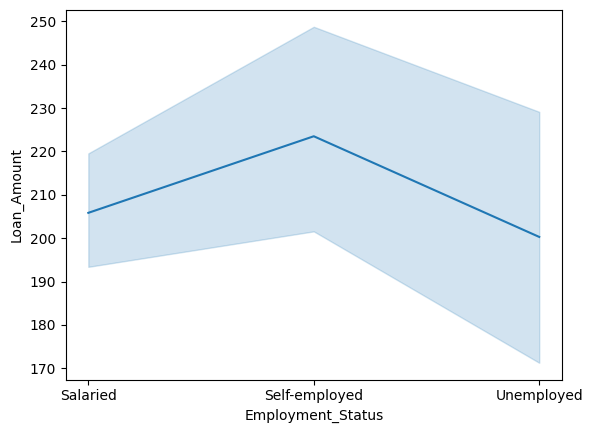

In [117]:
sns.lineplot(x='Employment_Status',y='Loan_Amount',data=data)

([<matplotlib.patches.Wedge at 0x7b63e736c3a0>,
 [Text(-0.2534283725512533, 1.0704083613210538, 'Salaried'),
  Text(-0.06906960848527934, -1.0978293989430645, 'Self-employed'),
  Text(1.0523832299782143, -0.3201398714009565, 'Unemployed')])

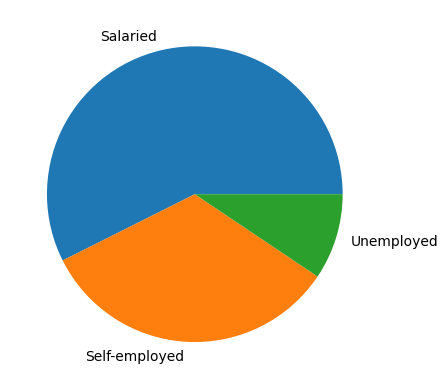

In [118]:
plt.pie(data['Employment_Status'].value_counts(),labels=data['Employment_Status'].value_counts().index)

<Axes: xlabel='Employment_Status', ylabel='count'>

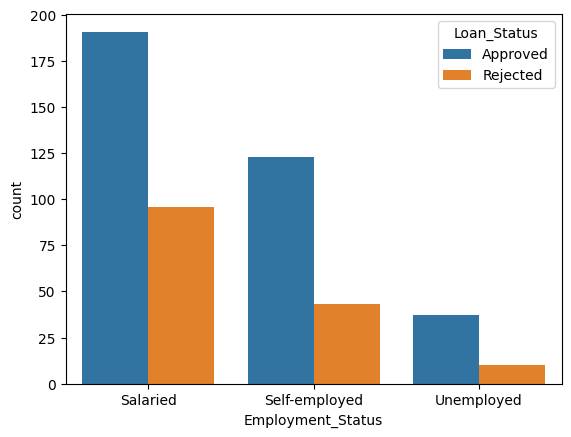

In [119]:
#we will compare which emplyment status got loan status approved
sns.countplot(x='Employment_Status',hue='Loan_Status',data=data)

we can see tha salaried people and self employed people got more loan approvals than unemployed people

<Axes: xlabel='Credit_Score', ylabel='count'>

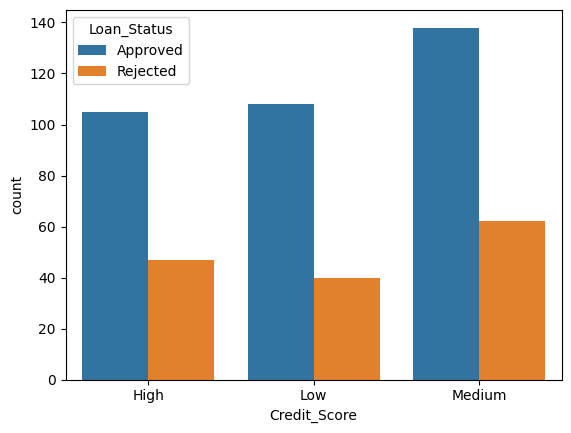

In [120]:
sns.countplot(x='Credit_Score',hue='Loan_Status',data=data)

In [121]:
data.columns

Index(['Applicant_ID', 'Age', 'Annual_Income', 'Loan_Amount', 'Credit_Score',
       'Loan_Tenure', 'Employment_Status', 'Dependents', 'Marital_Status',
       'Loan_Status'],
      dtype='object')

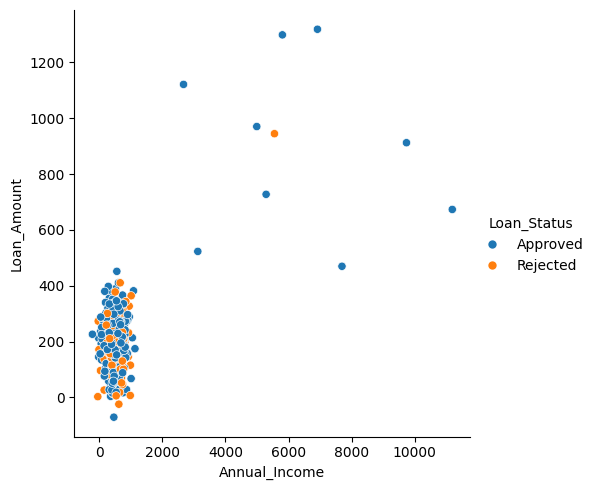

In [122]:
sns.relplot(x='Annual_Income',y='Loan_Amount',data=data, hue='Loan_Status')

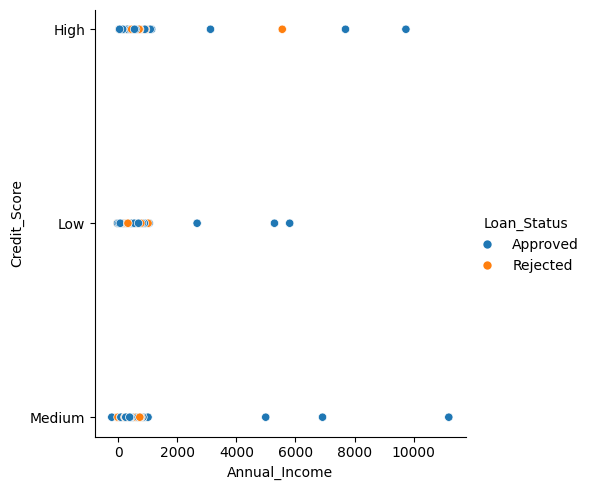

In [123]:
sns.relplot(x='Annual_Income',y='Credit_Score',data=data, hue='Loan_Status')

In [140]:
#we will build a decision tree classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [125]:
Le=LabelEncoder()

In [126]:
x=data.drop('Loan_Status',axis=1)
for col in x.select_dtypes(include=['object']).columns:
    x[col] = Le.fit_transform(x[col])

In [127]:
y=data['Loan_Status']
y_encoded = Le.fit_transform(y)
y=y_encoded

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
model=DecisionTreeClassifier(max_depth=5,max_features=5,min_samples_split=5)

In [130]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_split=5)

In [131]:
model.score(x_train,y_train)

0.735

 The model achieved an accuracy of 73.5% on the training dataset, indicating it has learned the patterns in the training data reasonably well

In [132]:
model.score(x_test,y_test)

0.62

On the test dataset, the accuracy dropped to 62%, suggesting some overfitting or the need for further tuning


In [134]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

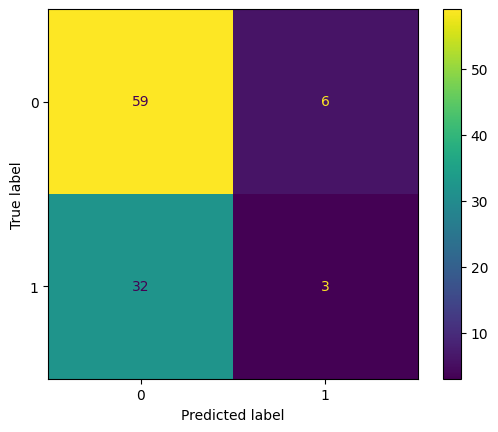

In [136]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [137]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.91      0.76        65\n           1       0.33      0.09      0.14        35\n\n    accuracy                           0.62       100\n   macro avg       0.49      0.50      0.45       100\nweighted avg       0.54      0.62      0.54       100\n'

Class 0 (Loan Not Approved): The precision (65%) and recall (91%) indicate the model performs better in identifying cases where the loan is not approved.

Class 1 (Loan Approved): The precision (33%) and recall (9%) are low, showing the model struggles to correctly predict loan approvals

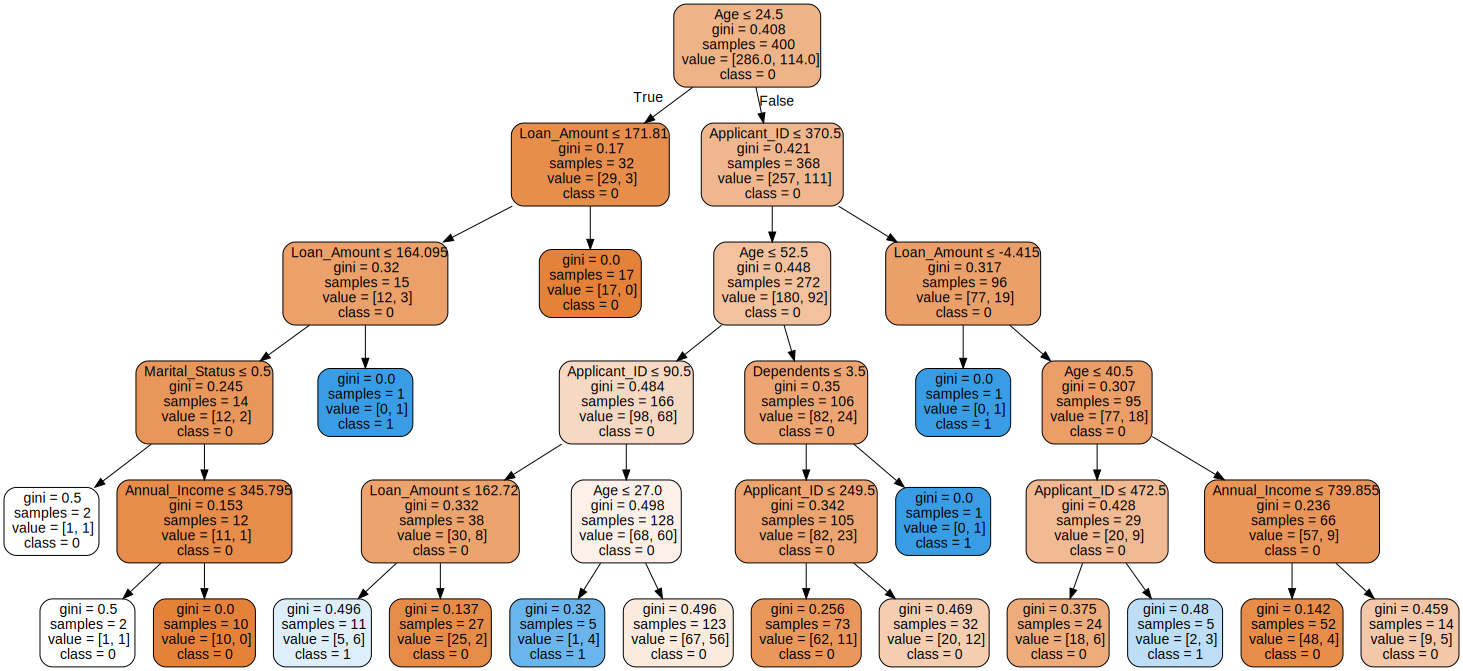

In [150]:
# will plot our tree colorfully
dot_data = export_graphviz(model, out_file=None, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph
